<a href="https://colab.research.google.com/github/drpetros11111/LazyProgrammer/blob/LP_Regression/LazyPr_LinearRegr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Creating the Model in Tensorflow

In [16]:
import tensorflow as tf

# Load in the data
from sklearn.datasets import load_breast_cancer # import sklearn
# load the data
data = load_breast_cancer()

# check the type of 'data'
type(data)
#sklearn.utils.Bunch

# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes


sklearn.utils._bunch.Bunch

In [17]:
data.keys()
#dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

# 'data' (the attribute) means the input data
data.data.shape

# it has 569 samples, 30 features
#(569, 30)


(569, 30)

In [19]:
# 'targets'
data.target

# note how the targets are just 0s and 1s

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [21]:
import numpy as np # import numpy

# their meaning is not lost

data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [22]:
np.array(['malignant', 'benign'], dtype='<U9') # call array function from np
# there are also 569 corresponding targets
data.target.shape

(569,)

In [6]:
# normally we would put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split


# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

# Scale the data
# you'll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now all the fun Tensorflow stuff
# Build the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7194 - loss: 0.5773 - val_accuracy: 0.7819 - val_loss: 0.4990
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7686 - loss: 0.5046 - val_accuracy: 0.8298 - val_loss: 0.4540
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7589 - loss: 0.5040 - val_accuracy: 0.8617 - val_loss: 0.4158
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8249 - loss: 0.4305 - val_accuracy: 0.8989 - val_loss: 0.3836
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8434 - loss: 0.3876 - val_accuracy: 0.9096 - val_loss: 0.3568
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8607 - loss: 0.3628 - val_accuracy: 0.9149 - val_loss: 0.3333
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8665 - loss: 0.3508 - val_accuracy: 0.9255 - val_loss: 0.3134
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8669 - loss: 0.3426 - val_accuracy: 0.936

# Explanation of the Training data fit.transform vs. Test transform (only)
The idea is that when you fit the StandardScaler on the training data, you calculate the mean and standard deviation of the training distribution, then transform both the training and test data using those parameters.

The test data is transformed under the assumption that it should follow a similar distribution as the training data, even if it's never used to calculate the scaler's parameters.

--------------------------
##Key Concepts:
Fitting the scaler on the training data adjusts it to the characteristics of the training set’s distribution.

The goal is to bring the training data into a standard normal distribution (mean = 0, standard deviation = 1).

Transforming the test data using the same parameters (mean and standard deviation from the training set) assumes that the test data should be drawn from a similar distribution.

This lets you evaluate how well your model generalizes to new, unseen data.

------------------------
##Relationship to Loss:
###Low loss:
If the test data follows a distribution similar to the training data, the model performs well.

This typically leads to lower errors, or "loss," when the model makes predictions on the test data.

This suggests that the data is consistent and that the model can generalize effectively.

###High loss:

If the test data's distribution is significantly different (e.g., different means or variances), the model may struggle to make accurate predictions because the test data hasn't been transformed in a way that aligns with the distribution on which the model was trained.

This results in higher loss, indicating poor model performance on the test set.

--------------------------------
#Why Only Transform the Test Data:
By only transforming and not fitting the test data, you ensure that the test set remains "unseen."

This prevents data leakage, where information from the test set could influence the model’s performance, which would give a false sense of how well the model is generalizing.

------------------------
#In summary

You fit and transform the training data to bring it into a standard normal distribution.

You only transform the test data, assuming it follows a similar distribution, to evaluate model performance.

If the distributions between the training and test sets are too different, you'll likely see a higher loss, indicating a potential mismatch between the training data and the real-world data you're trying to predict on.

---------------------
-------------------------
#Note:
 TensorFlow does not typically use cross-entropy to measure the difference between the training and test data distributions.

 Cross-entropy is generally used to measure the performance of classification models, comparing the predicted probability distribution over classes with the actual (ground truth) class distribution.

To measure the difference in the distributions between the training and test data, more appropriate methods might include:

-----------------
##Kullback-Leibler (KL) Divergence:

KL Divergence is a measure of how one probability distribution differs from another.

It’s sometimes used to quantify the difference between two distributions, including training vs. test data.

-------------------------------
##Wasserstein Distance (or Earth Mover's Distance):

This measures how much work is needed to transform one distribution into another.

It's another common way to measure distributional differences.

The Kolmogorov-Smirnov (K-S) test is a non-parametric statistical test that measures the difference between the empirical distributions of two samples.

It's often used to compare whether two datasets follow the same distribution, or to compare one dataset to a reference distribution (e.g., a normal distribution).

##How It Works:
The K-S test compares the cumulative distribution functions (CDFs) of two datasets.

In simpler terms, it checks how far apart the two distributions are at any point along the range of values.

If the distributions are similar, the CDFs should be close together.

##The K-S test outputs:

D-statistic: The maximum difference between the CDFs of the two datasets.

P-value: A value that tells us whether the difference is statistically significant.

A small p-value (typically < 0.05) suggests that the two distributions are different.

===============================================================
##Example:
Imagine you have the following distributions of house sizes (square footage) in your training and test datasets.

Training Set (in square feet):

   [1000,1200,1500,1800,2000,2200,2500]
Test Set (in square feet):

   [1100,1300,1600,1700,1900,2100,2400]
We want to compare whether these two sets of house sizes follow the same distribution. The K-S test will:

Calculate the cumulative distribution for both the training and test sets.

The cumulative distribution function (CDF) tells you, for any given value, the proportion of data points that are less than or equal to that value.

Compare the maximum difference between the CDFs of the two sets.
===============================================================
##Steps in the K-S Test:
###Create the CDFs:

Training Set CDF: At each point, calculate the proportion of training data points that are less than or equal to that point.

##est Set CDF:
Do the same for the test data.

##Calculate the D-statistic:

The D-statistic is the largest vertical distance between the CDFs of the training and test data.

##Calculate the P-value:

This value will indicate if the two distributions are significantly different or not.

A small p-value (e.g., < 0.05) suggests that the test set has a different distribution than the training set.

===============================================================
##Intuition Behind the K-S Test:
If the two datasets have similar CDFs, their distributions are likely similar.

If there’s a large gap between the CDFs, the distributions are likely different. For example:

If the training set has mostly smaller houses and the test set has mostly larger houses, the CDFs will show this difference.

The K-S test highlights the point where the difference between the two CDFs is the greatest, helping us understand where the distributions differ the most.

##Application in Machine Learning:
You can use the K-S test to check whether the feature distributions (e.g., house size, age, income, etc.) in the training data and test data are similar.

If the distributions are very different, this could be a sign that your model may not generalize well to unseen data, leading to higher loss or poor performance.

=============================================================
##Example Calculation:
Let’s say after running the K-S test on the house sizes above, we get:

    D-statistic = 0.1
    P-value = 0.8
Since the p-value is high, we can conclude that the distributions of house sizes in the training and test sets are not significantly different, meaning they likely come from the same distribution.

====================
##Summary of the K-S Test:
It compares two datasets by measuring the maximum difference between their cumulative distributions.

The D-statistic quantifies this difference.

The p-value indicates if the difference is statistically significant.

It’s useful in ML to check if the feature distributions in the training and test sets are similar, helping you understand how well your model might generalize.
--------------------------------
##Statistical Tests:

You can use statistical tests like the Kolmogorov-Smirnov (K-S) test to compare the training and test distributions.

The K-S test measures how well two samples follow the same distribution.

----------------------------------
##Cross-Entropy:
In the context of classification tasks, cross-entropy measures the difference between the predicted probability distribution and the true label distribution (usually in one-hot encoding).

It's not used for comparing the overall feature distributions of the training and test datasets.

###Why Not Cross-Entropy for Distribution Comparison?
Cross-entropy is specifically about comparing class probabilities for classification problems, rather than comparing continuous feature distributions.

If you want to see how similar the distributions of features are (e.g., feature values of the training vs. test data), cross-entropy wouldn't be appropriate.

If you are looking for ways to measure whether your feature distributions between the training and test sets are similar, techniques like KL divergence or other statistical approaches would be better suited.

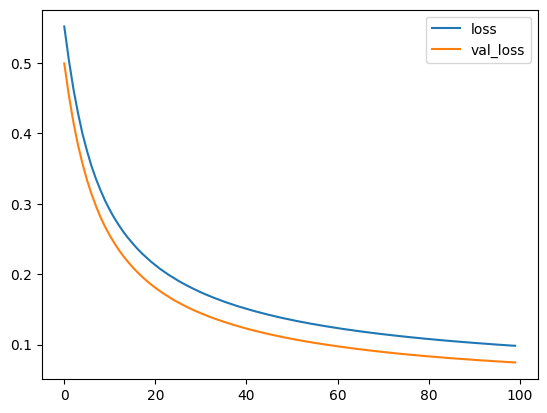

In [7]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

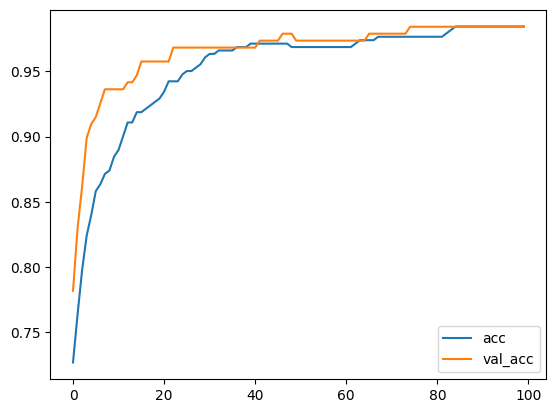

In [8]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Part 2: Making Predictions

In [9]:
# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[3.7548458e-04]
 [8.5585529e-01]
 [9.9871057e-01]
 [9.8985416e-01]
 [9.9883157e-01]
 [1.9471997e-07]
 [7.4313866e-06]
 [6.7185269e-05]
 [9.4724792e-01]
 [9.9284726e-01]
 [9.9135768e-01]
 [6.3395059e-01]
 [9.8374426e-01]
 [8.7804681e-01]
 [9.7994465e-01]
 [9.4565672e-01]
 [5.5422192e-04]
 [9.7245592e-01]
 [9.9003494e-01]
 [9.7773856e-01]
 [9.8810667e-01]
 [9.4765204e-01]
 [2.2893542e-01]
 [7.2845817e-01]
 [9.8440534e-01]
 [9.1397667e-01]
 [1.3168381e-01]
 [9.8111570e-01]
 [9.7859663e-01]
 [7.1615221e-05]
 [4.7807419e-01]
 [9.9370617e-01]
 [9.9606192e-01]
 [9.9716443e-01]
 [2.8712919e-01]
 [1.9681139e-04]
 [2.5540647e-01]
 [8.3050656e-04]
 [8.7470818e-01]
 [9.9717993e-01]
 [9.5819664e-01]
 [9.7916293e-01]
 [1.9874751e-04]
 [1.4447814e-01]
 [5.6468845e-05]
 [9.5728076e-01]
 [9.9890524e-01]
 [9.8630768e-01]
 [9.6447676e-01]
 [4.2373142e-03]
 [1.7530780e-02]
 [9.9837279e-01]
 [9.6562707e-01]
 [8.9555109e-01]
 [8.3385223e-01]
 [6.7195028e-01]
 [9.994425

In [10]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.]


In [11]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9840425531914894
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9925 - loss: 0.0733 
Evaluate output: [0.07464136183261871, 0.9840425252914429]


# Part 3: Saving and Loading a Model

In [13]:
# Let's now save our model to a file
model.save('linearclassifier.h5')
# Check that the model file exists
!ls -lh linearclassifier.h5

# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417

model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

-rw-r--r-- 1 root root 18K Sep 25 18:19 linearclassifier.h5


[<Dense name=dense, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9925 - loss: 0.0733  


[0.07464136183261871, 0.9840425252914429]

In [14]:
# Download the file - requires Chrome (at this point)
from google.colab import files
files.download('linearclassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>